In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#add other imports as needed

In [7]:
import os

In [8]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

In [9]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

Use code below to access Neuropixels data set. This is electrophysiological data. It is very similar to the data set we demonstrated, but has important differences, both in the science and in the access methods used in the python tools.

In [10]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [11]:
areas = boc.get_all_targeted_structures()
areas

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [12]:
cre_lines = boc.get_all_cre_lines()
cre_lines

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [13]:
#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas,index=cre_lines)

#populate the dataframe with the number of experiment containers for each combination
for cre in cre_lines:
    for area in areas:
        exps = boc.get_experiment_containers(targeted_structures=[area],cre_lines=[cre])
        df[area].loc[cre] =len(exps)

#look at dataframe
df

,VISal,VISam,VISl,VISp,VISpm,VISrl
Cux2-CreERT2,13,11,11,16,13,12
Emx1-IRES-Cre,7,3,8,10,4,9
Fezf2-CreER,0,0,5,4,0,0
Nr5a1-Cre,6,6,6,8,7,6
Ntsr1-Cre_GN220,0,0,7,6,5,0
Pvalb-IRES-Cre,0,0,5,16,0,0
Rbp4-Cre_KL100,6,8,7,7,6,4
Rorb-IRES2-Cre,6,8,6,8,7,5
Scnn1a-Tg3-Cre,0,0,0,9,0,0
Slc17a7-IRES2-Cre,2,2,16,20,15,2


In [14]:
visual_area = areas[3]

In [15]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area])
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False
1,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False
2,644909309,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),348105,Ntsr1-Cre_GN220;Ai148-348105,[],False
3,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
4,528792730,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),248894,Nr5a1-Cre;Camk2a-tTA;Ai93-248894,[],False
...,...,...,...,...,...,...,...,...,...
139,511510718,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),231584,Cux2-CreERT2;Camk2a-tTA;Ai93-231584,[],False
140,511510989,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),222431,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-222431,[],False
141,527676429,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False
142,580043437,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297504,Sst-IRES-Cre;Ai148(CAM)-297504,[],False


In [76]:
experiment_container_ids = [exps[120]['id']]

In [77]:
sessions = boc.get_ophys_experiments(experiment_container_ids=experiment_container_ids, stimuli=['natural_scenes'])

In [78]:
session_id = sessions[0]['id']
session_id

660065134

In [79]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [80]:
cell_ids = data_set.get_cell_specimen_ids()
cell_ids.shape

(158,)

In [81]:
# get the stimulus table for the natural scenes stimulus
stim_table = data_set.get_stimulus_table('natural_scenes')

,frame,start,end
0,7,16126,16133
1,3,16134,16141
2,75,16141,16148
3,79,16149,16156
4,37,16157,16164
...,...,...,...
5945,65,96276,96283
5946,93,96284,96291
5947,21,96291,96298
5948,94,96299,96306


In [95]:
# get trial-to-trial dff traces
timestamps, dff = data_set.get_dff_traces()
dff.shape

(158, 114116)

In [96]:
stim_start = stim_table.start.min()
stim_end = stim_table.end.max()
dff = dff[:, stim_start:stim_end]
dff.shape

(158, 80187)

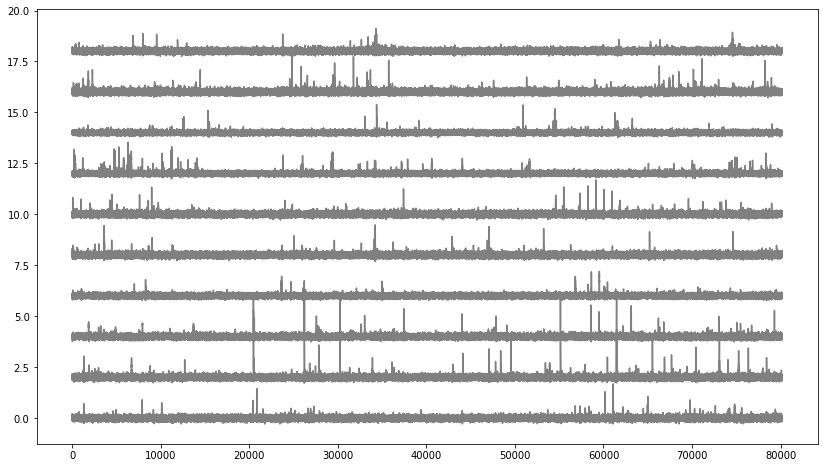

In [99]:
fig = plt.figure(figsize=(14,8))
for i in range(10):
    plt.plot(dff[i,:]+(i*2), color='gray')